## Homework Week 4: 




In this homework, we will use the Car price dataset like last week. Download it from here:

- wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv

In [133]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

%matplotlib inline

In [3]:
df = pd.read_csv('/home/timur/work_hub/ml_zoomcamp2023/4. Evaluation Metrics for Classification/data.csv')

In [4]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


We'll work with the MSRP variable, and we'll transform it to a classification task.

For the rest of the homework, you'll need to use only these columns:

- Make
- Model
- Year
- Engine HP
- Engine Cylinders
- Transmission Type
- Vehicle Style
- highway MPG
- city mpg
- MSRP

## Data preparation

- Keep only the columns above
- Lowercase the column names and replace spaces with underscores
- Fill the missing values with 0
- Make the price binary (1 if above the average, 0 otherwise) - this will be our target variable above_average

Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use train_test_split function for that with random_state=1

In [8]:
feautres = ['Make',
            'Model',
            'Year',
            'Engine HP',
            'Engine Cylinders',
            'Transmission Type',
            'Vehicle Style',
            'highway MPG',
            'city mpg',
            'MSRP']

#### Keep only the columns above

In [10]:
df = df[feautres]
df

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920


#### Lowercase the column names and replace spaces with underscores

In [15]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920


#### Let's do the same for object type data in our dataset

In [16]:
df.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
msrp                   int64
dtype: object

In [41]:
categorical_variables = list(df.dtypes[df.dtypes == 'object'].index)
categorical_variables

['make', 'model', 'transmission_type', 'vehicle_style']

In [42]:
numerical = ['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']

In [24]:
for c in categorical_variables:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [26]:
df

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,46135
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,40650
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,36350
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,29450
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,46120
11910,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,56670
11911,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,50620
11912,acura,zdx,2013,300.0,6.0,automatic,4dr_hatchback,23,16,50920


#### Fill the missing values with 0

In [27]:
df.isna().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [30]:
df[['engine_hp', 'engine_cylinders']] = df[['engine_hp', 'engine_cylinders']].fillna(0)

In [31]:
df.isna().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

#### Make the price binary (1 if above the average, 0 otherwise) - this will be our target variable above_average

In [43]:
df['above_average'] = (df.msrp > df.msrp.mean()).astype('int')
df

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp,above_average
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,46135,1
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,40650,1
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,36350,0
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,29450,0
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,34500,0
...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,46120,1
11910,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,56670,1
11911,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,50620,1
11912,acura,zdx,2013,300.0,6.0,automatic,4dr_hatchback,23,16,50920,1


In [44]:
df.above_average.value_counts()

above_average
0    8645
1    3269
Name: count, dtype: int64

####  Split the data

In [96]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [97]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [98]:
len(df_train), len(df_val), len(df_test)

(7148, 2383, 2383)

In [99]:
df_train

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp,above_average
5727,toyota,highlander_hybrid,2016,280.0,6.0,automatic,4dr_suv,28,27,50485,1
5814,chevrolet,impala_limited,2014,300.0,6.0,automatic,sedan,30,18,26840,0
8450,buick,regal,2016,259.0,4.0,automatic,sedan,27,19,36490,0
2396,volkswagen,cc,2015,280.0,6.0,automated_manual,sedan,25,17,43575,1
5494,dodge,grand_caravan,2016,283.0,6.0,automatic,passenger_minivan,25,17,22595,0
...,...,...,...,...,...,...,...,...,...,...,...
5864,subaru,impreza,2015,148.0,4.0,manual,4dr_hatchback,33,24,20995,0
7924,infiniti,qx50,2016,325.0,6.0,automatic,4dr_suv,24,17,35850,0
4719,honda,fit,2017,130.0,4.0,automatic,4dr_hatchback,37,32,20265,0
63,audi,200,1991,162.0,5.0,automatic,sedan,20,16,2000,0


In [100]:
y_train = df_train['above_average'].values
y_val = df_val['above_average'].values
y_test = df_test['above_average'].values

In [101]:
y_train

array([1, 0, 0, ..., 0, 0, 0])

In [102]:
df_train.drop(['msrp', 'above_average'], axis=1, inplace=True)
df_val.drop(['msrp', 'above_average'], axis=1, inplace=True)
df_test.drop(['msrp', 'above_average'], axis=1, inplace=True)

In [103]:
df_train

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg
5727,toyota,highlander_hybrid,2016,280.0,6.0,automatic,4dr_suv,28,27
5814,chevrolet,impala_limited,2014,300.0,6.0,automatic,sedan,30,18
8450,buick,regal,2016,259.0,4.0,automatic,sedan,27,19
2396,volkswagen,cc,2015,280.0,6.0,automated_manual,sedan,25,17
5494,dodge,grand_caravan,2016,283.0,6.0,automatic,passenger_minivan,25,17
...,...,...,...,...,...,...,...,...,...
5864,subaru,impreza,2015,148.0,4.0,manual,4dr_hatchback,33,24
7924,infiniti,qx50,2016,325.0,6.0,automatic,4dr_suv,24,17
4719,honda,fit,2017,130.0,4.0,automatic,4dr_hatchback,37,32
63,audi,200,1991,162.0,5.0,automatic,sedan,20,16


In [104]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [105]:
df_test

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg
0,lotus,evora_400,2017,400.0,6.0,manual,coupe,39,21
1,aston_martin,v8_vantage,2014,420.0,8.0,automated_manual,convertible,21,14
2,hyundai,genesis,2015,311.0,6.0,automatic,sedan,29,18
3,suzuki,samurai,1993,66.0,4.0,manual,convertible_suv,26,24
4,mitsubishi,outlander,2015,166.0,4.0,automatic,4dr_suv,29,24
...,...,...,...,...,...,...,...,...,...
2378,mitsubishi,endeavor,2008,225.0,6.0,automatic,4dr_suv,19,15
2379,bentley,continental_flying_spur,2013,552.0,12.0,automatic,sedan,19,11
2380,kia,optima,2014,274.0,4.0,automatic,sedan,31,20
2381,lamborghini,aventador,2014,700.0,12.0,automated_manual,convertible,16,10


## Question 1: ROC AUC feature importance


ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

- For each numerical variable, use it as score and compute AUC with the above_average variable
- Use the training dataset for that

If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. -df_train['engine_hp'])

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

#### Which numerical variable (among the following 4) has the highest AUC?

- engine_hp
- engine_cylinders
- highway_mpg
- city_mpg

In [106]:
auc_scores = {}

In [107]:
numerical

['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']

In [108]:
for n in numerical:
    auc = roc_auc_score(y_train, df_train[n])
    
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[n])
    
    auc_scores[n] = auc

In [109]:
auc_scores

{'year': 0.687551492804683,
 'engine_hp': 0.9171031265539011,
 'engine_cylinders': 0.766116490165669,
 'highway_mpg': 0.6330587871772013,
 'city_mpg': 0.6734244643245233}

## Answer: 

- engine_hp has the highest AUC - 0.91

## Question 2: Training the model

Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:

LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.678
- 0.779
- 0.878
- 0.979

In [110]:
from sklearn.feature_extraction import DictVectorizer

In [156]:
train_dict = df_train[categorical_variables + numerical].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dict)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

val_dict = df_val[categorical_variables + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]

roc_auc_score(y_val, y_pred)

0.976576055523424

## Answer: 
- 0.979

## Question 3: Precision and Recall
    
Now let's compute precision and recall for our model.

- Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
- For each threshold, compute precision and recall
- Plot them


At which threshold precision and recall curves intersect?

- 0.28
- 0.48
- 0.68
- 0.88

In [157]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
    
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    
    scores.append((t, tp, fp, fn, tn))

In [158]:
scores

[(0.0, 654, 1729, 0, 0),
 (0.01, 652, 839, 2, 890),
 (0.02, 651, 680, 3, 1049),
 (0.03, 651, 592, 3, 1137),
 (0.04, 650, 543, 4, 1186),
 (0.05, 649, 481, 5, 1248),
 (0.06, 648, 444, 6, 1285),
 (0.07, 648, 419, 6, 1310),
 (0.08, 647, 402, 7, 1327),
 (0.09, 645, 377, 9, 1352),
 (0.1, 643, 345, 11, 1384),
 (0.11, 643, 323, 11, 1406),
 (0.12, 641, 309, 13, 1420),
 (0.13, 640, 286, 14, 1443),
 (0.14, 638, 276, 16, 1453),
 (0.15, 637, 266, 17, 1463),
 (0.16, 636, 260, 18, 1469),
 (0.17, 633, 254, 21, 1475),
 (0.18, 630, 241, 24, 1488),
 (0.19, 626, 228, 28, 1501),
 (0.2, 622, 218, 32, 1511),
 (0.21, 622, 214, 32, 1515),
 (0.22, 621, 209, 33, 1520),
 (0.23, 620, 203, 34, 1526),
 (0.24, 616, 192, 38, 1537),
 (0.25, 613, 189, 41, 1540),
 (0.26, 611, 177, 43, 1552),
 (0.27, 608, 171, 46, 1558),
 (0.28, 608, 168, 46, 1561),
 (0.29, 606, 162, 48, 1567),
 (0.3, 606, 159, 48, 1570),
 (0.31, 603, 148, 51, 1581),
 (0.32, 601, 146, 53, 1583),
 (0.33, 598, 141, 56, 1588),
 (0.34, 596, 136, 58, 1593),
 (

In [159]:
columns = ['thresholds', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

In [160]:
df_scores

,thresholds,tp,fp,fn,tn
0,0.00,654,1729,0,0
1,0.01,652,839,2,890
2,0.02,651,680,3,1049
3,0.03,651,592,3,1137
4,0.04,650,543,4,1186
...,...,...,...,...,...
96,0.96,255,1,399,1728
97,0.97,237,1,417,1728
98,0.98,211,0,443,1729
99,0.99,181,0,473,1729


In [163]:
df_scores['precision'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['recall'] = df_scores.tp / (df_scores.tp + df_scores.fn)

In [164]:
df_scores

,thresholds,tp,fp,fn,tn,precision,recall
0,0.00,654,1729,0,0,0.274444,1.000000
1,0.01,652,839,2,890,0.437290,0.996942
2,0.02,651,680,3,1049,0.489106,0.995413
3,0.03,651,592,3,1137,0.523733,0.995413
4,0.04,650,543,4,1186,0.544845,0.993884
...,...,...,...,...,...,...,...
96,0.96,255,1,399,1728,0.996094,0.389908
97,0.97,237,1,417,1728,0.995798,0.362385
98,0.98,211,0,443,1729,1.000000,0.322630
99,0.99,181,0,473,1729,1.000000,0.276758


Plot it

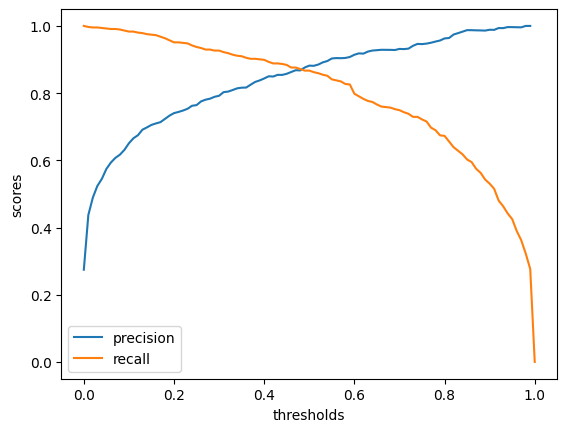

In [169]:
plt.plot(df_scores.thresholds, df_scores.precision, label = 'precision')
plt.plot(df_scores.thresholds, df_scores.recall, label = 'recall')


plt.xlabel('thresholds')
plt.ylabel('scores')

plt.legend()
plt.show()

## Answer: 

- 0.48